# MNIST Handwritten Digit Recognition - Manual Neural Network Implementation
This notebook was generated via an LLM tasked with creating a guided tutorial with pseudo code and instructions. It was designed to help you build a neural network from scratch (without using libraries such as TensorFlow or PyTorch) to classify handwritten digits from the MNIST dataset. Follow the instructions in each section to implement the various components of your neural network.

## 1. Setup

In this section, we import the necessary libraries. We'll use NumPy for numerical computations and Matplotlib for visualization. Feel free to add any additional libraries you might need for handling data.

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

## 2. Data Loading and Preprocessing

In this step, you will load the MNIST dataset. Since we are not using high-level libraries, you have a couple of options:

- **Option A:** Download the raw MNIST data files (e.g., from [Yann LeCun's website](http://yann.lecun.com/exdb/mnist/)) and use NumPy functions such as `np.frombuffer` to load the data.
- **Option B:** Use an available helper script or package to load the dataset in a NumPy array format.

After loading, remember to:
  - **Normalize** the pixel values (e.g., divide by 255.0) so that they lie in the range [0, 1].
  - **Flatten** each 28x28 image into a 784-dimensional vector if necessary.

Write your code in the cell below.

In [174]:
root = './data/'
train_images_filepath = root + 'train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels_filepath = root + 'train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_filepath = root + 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_filepath = root + 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

def load_mnist_images(filepath):
    with open(filepath, 'rb') as f:
        raw_images = np.frombuffer(f.read(), np.uint8, offset=16).reshape(-1, 28, 28)
    data = raw_images.reshape(raw_images.shape[0], -1) / 255.0
    return data

def load_mnist_labels(filepath):
    with open(filepath, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

train_images = load_mnist_images(train_images_filepath)
train_labels = load_mnist_labels(train_labels_filepath)
test_images = load_mnist_images(test_images_filepath)
test_labels = load_mnist_labels(test_labels_filepath)

In [175]:
def one_hot(labels, num_classes):
    onehot = np.zeros((labels.shape[0], num_classes))
    onehot[np.arange(labels.shape[0]), labels] = 1
    return onehot

train_labels_onehot = one_hot(train_labels, len(np.unique(train_labels)))
test_labels_onehot = one_hot(test_labels, len(np.unique(train_labels)))

## 3. Neural Network Implementation

We will now build the components of our neural network step by step. The goal is to create a simple feedforward network with one hidden layer.

### 3.1 Initialize Parameters

Define a function to initialize weights and biases for each layer. For example, if your network has an input layer (size 784), one hidden layer, and an output layer (size 10), you'll need to initialize:

- Weights and biases for the hidden layer
- Weights and biases for the output layer

Add a code cell below with your implementation.

In [176]:
def initialize_parameters(input_size, hidden_size, output_size):
    W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1. / input_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1. / input_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

### 3.2 Forward Propagation

Implement the forward pass through the network. This will include:

- A linear transformation: **Z = X · W + b**
- Activation functions: for instance, use **ReLU** for the hidden layer and **softmax** for the output layer

Write functions to perform these operations. Consider separating the linear computation and activation into different functions for clarity.

In [177]:
def relu(Z):
    return np.maximum(0, Z)

def softmax(Z):
    exps = np.exp(Z - np.max(Z, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def linear_forward(X, W, b):
    Z = np.dot(X, W) + b
    return Z

def forward_pass(X, W1, b1, W2, b2):
    Z1 = linear_forward(X, W1, b1)
    A1 = relu(Z1)
    Z2 = linear_forward(A1, W2, b2)
    A2 = softmax(Z2)
    return A2

### 3.3 Compute the Loss

Implement a function to compute the loss between the predicted outputs and the true labels. A common choice for multi-class classification is the cross-entropy loss.

In the next cell, add your code for computing the loss.

In [178]:
def compute_loss(predictions, labels):
    m = labels.shape[0]
    log_likelihood = -np.log(predictions[range(m), labels])
    loss = np.sum(log_likelihood) / m
    return loss

### 3.4 Backpropagation

Next, derive and implement the backpropagation algorithm to compute the gradients for your weights and biases. This step involves:

- Calculating the gradient of the loss with respect to the output of the network
- Propagating these gradients backward through the network layers
- Updating the parameters using gradient descent

Add your implementation in the following cell.

In [179]:
# TODO: Implement backpropagation functions
# Consider writing separate functions for:
# - Calculating gradients for each layer
# - Updating weights and biases using a learning rate

def relu_derivative(Z):
    """
    Compute derivative of the ReLU function.
    """
    dZ = np.zeros_like(Z)
    dZ[Z > 0] = 1
    return dZ

def backpropagate(X, y, weights1, biases1, weights2, biases2, cache=None):
    """
    Compute gradients for all parameters using backpropagation.
    
    Args:
        X: Input features (batch_size, input_size)
        y: True labels (batch_size,)
        weights1, biases1: Parameters for hidden layer
        weights2, biases2: Parameters for output layer
        cache: Optional cached values from forward pass
    
    Returns:
        Gradients for all parameters
    """
    m = X.shape[0]
    
    # Forward pass if cache not provided
    if cache is None:
        Z1 = linear_forward(X, weights1, biases1)
        A1 = relu(Z1)
        Z2 = linear_forward(A1, weights2, biases2)
        A2 = softmax(Z2)
    else:
        Z1, A1, Z2, A2 = cache
    
    # Convert y to one-hot encoding
    y_one_hot = np.zeros((m, weights2.shape[1]))
    y_one_hot[np.arange(m), y] = 1
    
    # Backpropagation for output layer
    dZ2 = A2 - y_one_hot
    dW2 = np.dot(A1.T, dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    # Backpropagation through hidden layer
    dA1 = np.dot(dZ2, weights2.T)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(X.T, dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2

def update_parameters(weights1, biases1, weights2, biases2, dW1, db1, dW2, db2, learning_rate):
    """
    Update network parameters using gradient descent.
    """
    weights1 -= learning_rate * dW1
    biases1 -= learning_rate * db1
    weights2 -= learning_rate * dW2
    biases2 -= learning_rate * db2
    
    return weights1, biases1, weights2, biases2


### 3.5 Training the Network

Now, put everything together in a training loop. In each epoch:

- Run the forward propagation
- Compute the loss
- Run the backpropagation to compute gradients
- Update the parameters using gradient descent

You may also want to print the loss periodically to monitor training progress.

In [180]:
X_train = train_images
Y_train = train_labels

m = X_train.shape[1]
nh_out = len(set(Y_train))
W1, b1, W2, b2 = initialize_parameters(m, 128, 10)

num_epochs = 1000
learning_rate = 0.01
display_step = 10
for epoch in range(num_epochs):
    output = forward_pass(X_train, W1, b1, W2, b2)
    loss = compute_loss(output, Y_train)
    dW1, db1, dW2, db2 = backpropagate(X_train, Y_train, W1, b1, W2, b2)
    W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
    if epoch % display_step == 0:
        print(f'Epoch {epoch}, Loss: {loss}')

Epoch 0, Loss: 2.2856770673722333
Epoch 10, Loss: 2.2703578722521485
Epoch 20, Loss: 2.255101915033733
Epoch 30, Loss: 2.2397640584090226
Epoch 40, Loss: 2.224217207275165
Epoch 50, Loss: 2.2083557578811055
Epoch 60, Loss: 2.192073414368959
Epoch 70, Loss: 2.1752788960152256
Epoch 80, Loss: 2.1578840383176017
Epoch 90, Loss: 2.139816483312989
Epoch 100, Loss: 2.121008039282456
Epoch 110, Loss: 2.1014051772534414
Epoch 120, Loss: 2.080972334077116
Epoch 130, Loss: 2.0596835159540086
Epoch 140, Loss: 2.0375173851358235
Epoch 150, Loss: 2.0144692862677616
Epoch 160, Loss: 1.9905427024610056
Epoch 170, Loss: 1.9657468526104729
Epoch 180, Loss: 1.9401064606366483
Epoch 190, Loss: 1.9136505098679837
Epoch 200, Loss: 1.8864192882129758
Epoch 210, Loss: 1.8584598260204022
Epoch 220, Loss: 1.8298319986539344
Epoch 230, Loss: 1.8005889810414801
Epoch 240, Loss: 1.7707965872879814
Epoch 250, Loss: 1.7405397555629907
Epoch 260, Loss: 1.7099044024415688
Epoch 270, Loss: 1.678984464799294
Epoch 280,

### 3.6 Evaluation

After training your model, evaluate its performance on the test set. In this step, you should:

- Compute the accuracy of your model on the test data
- Optionally, visualize a few predictions versus the actual labels

Implement your evaluation code in the cell below.

Test accuracy: 0.8617


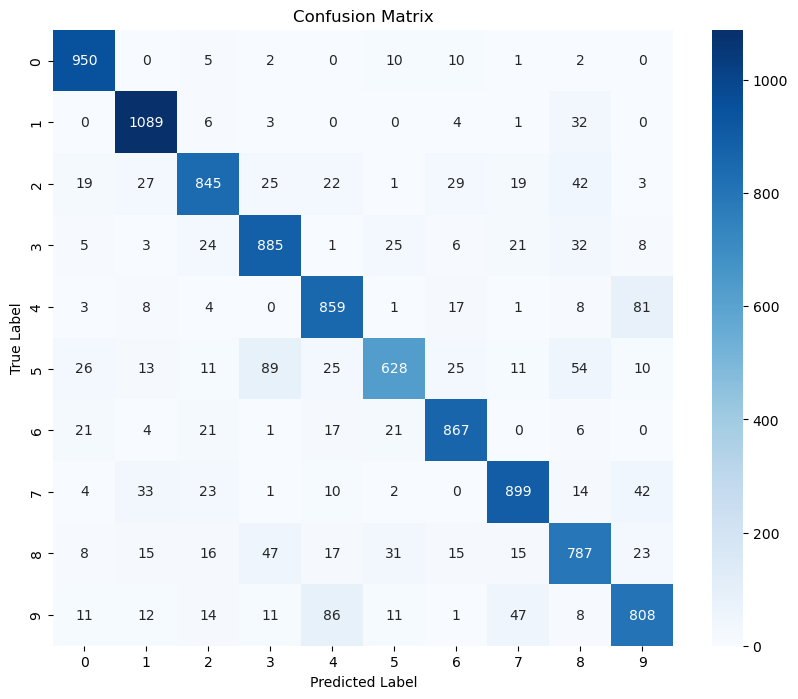

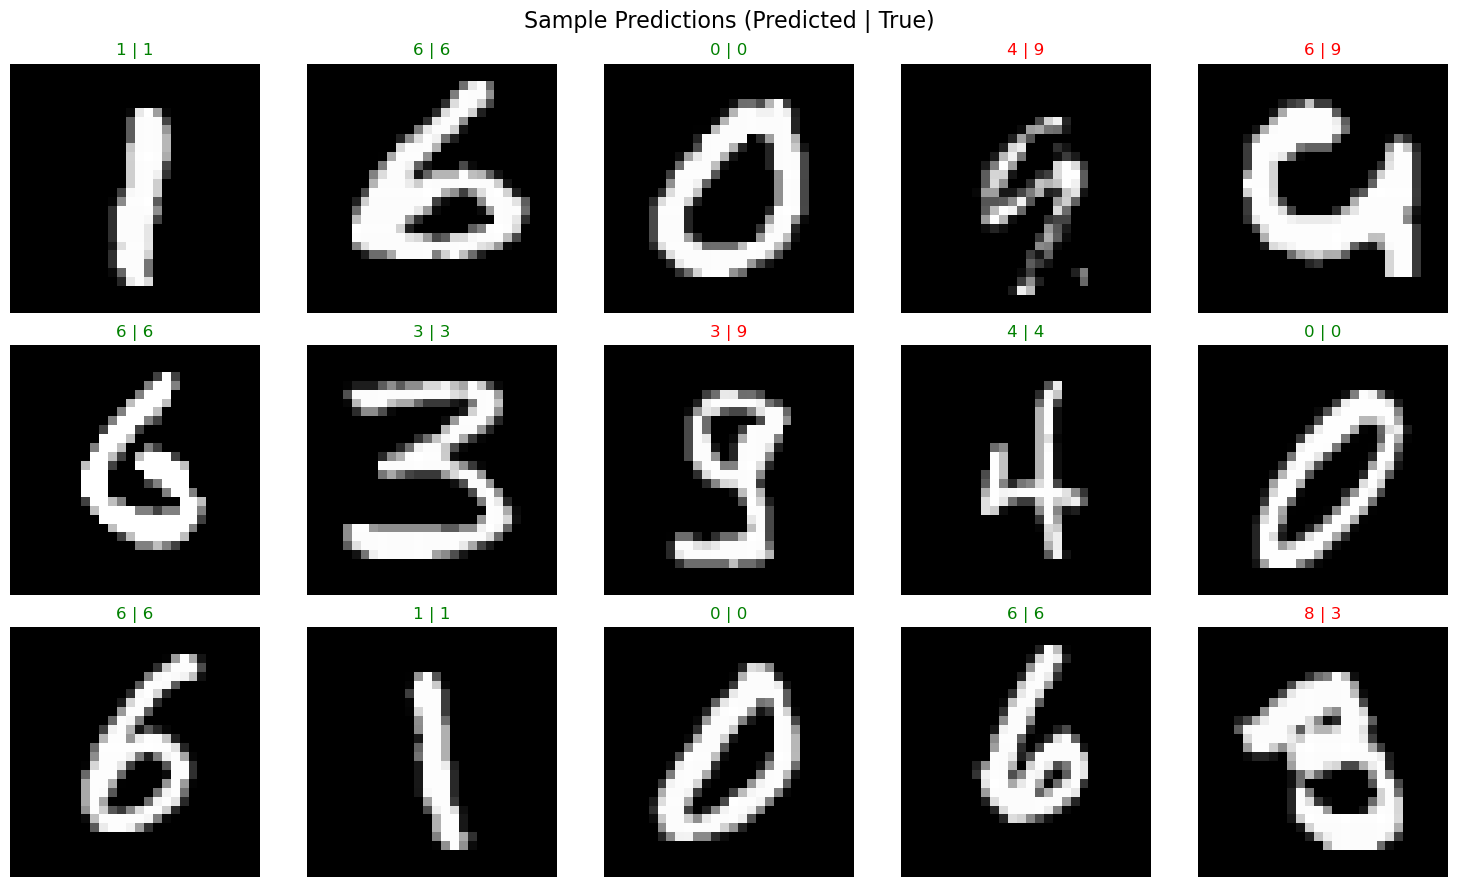

In [ ]:
# TODO: Evaluate the model
# 1. Use your forward_pass function to get predictions on X_test
# 2. Calculate the accuracy by comparing the predicted labels with the true labels
# 3. (Optional) Visualize some of the test images along with the predicted and actual labels

# Make predictions on test data
test_predictions = forward_pass(test_images, W1, b1, W2, b2)
predicted_labels = np.argmax(test_predictions, axis=1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == test_labels)
print(f"Test accuracy: {accuracy:.4f}")

# Create a confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Visualize some examples
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
fig.suptitle('Sample Predictions (Predicted | True)', fontsize=16)

# Get random indices to visualize
samples = np.random.randint(0, len(test_images), 15)

for i, ax in enumerate(axes.flat):
    # Get sample index
    idx = samples[i]
    
    # Display image
    ax.imshow(test_images[idx].reshape(28, 28), cmap='gray')
    
    # Display prediction vs true label
    pred_label = predicted_labels[idx]
    true_label = test_labels[idx]
    ax.set_title(f"{pred_label} | {true_label}", 
                color='green' if pred_label == true_label else 'red')
    ax.axis('off')

plt.tight_layout()
plt.show()

## 4. Additional Considerations

- Experiment with different network architectures (e.g., more hidden layers or different activation functions).
- Try to implement regularization techniques (like dropout or weight decay) if you find overfitting.
- Visualize training progress (loss curves, accuracy, etc.) to gain better insights into the training process.

Happy coding and enjoy your journey into building neural networks from scratch!